In [1]:
import matplotlib.pyplot as plt
import numpy as np

from src.main_pipeline import *

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline

In [4]:
import os
os.getcwd()

'C:\\Users\\Sheffield_lab\\PycharmProjects\\subprep\\jupyter'

# Load data

In [3]:
# load sample data (roi by time frame)
# note: if using suite2p, use all ROIs by loading F.npy file for channel1 and F_chan2.npy for channel2
raw = np.load('C:\\Users\\Sheffield_lab\\PycharmProjects\\subprep\\data\\F.npy')
raw.shape   # note: not the full dataset, suite2p will return 5000 rois for any given axon FOV

(1000, 7500)

In [5]:
# load red static channel (if available)
raw_red = np.load('C:\\Users\\Sheffield_lab\\PycharmProjects\\subprep\\data\\F_chan2.npy')
raw_red.shape

(1000, 7500)

In [4]:
# apply smoothing filter. Optional: can be any denoising filter

data = smooth_data(raw)

Text(0.5, 1.0, 'example cell: raw')

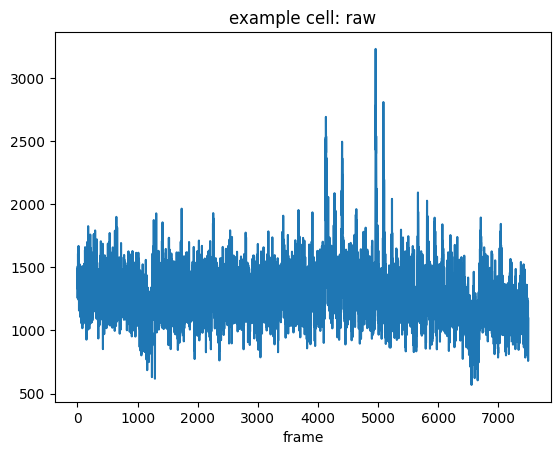

In [5]:
plt.plot(raw[371, :])
plt.xlabel('frame')
plt.title('example cell: raw')

Text(0.5, 1.0, 'example cell: smoothed')

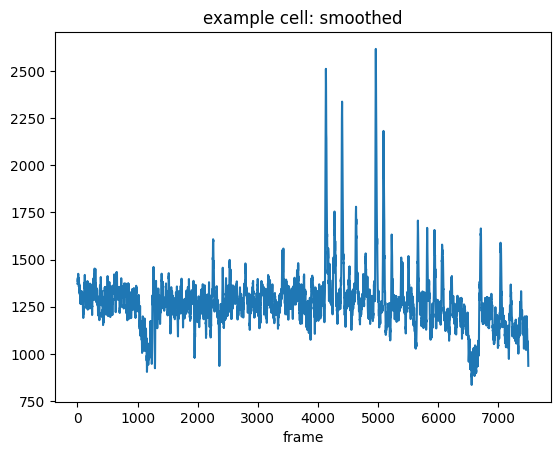

In [6]:
plt.plot(data[371, :])
plt.xlabel('frame')
plt.title('example cell: smoothed')

# ROI selection

In [5]:
roi = SelectROI()

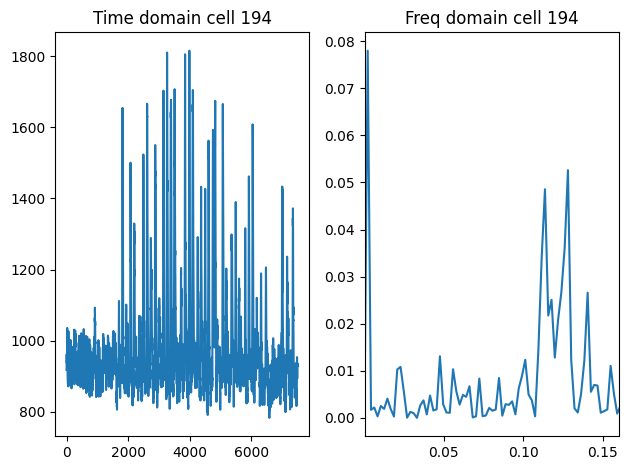

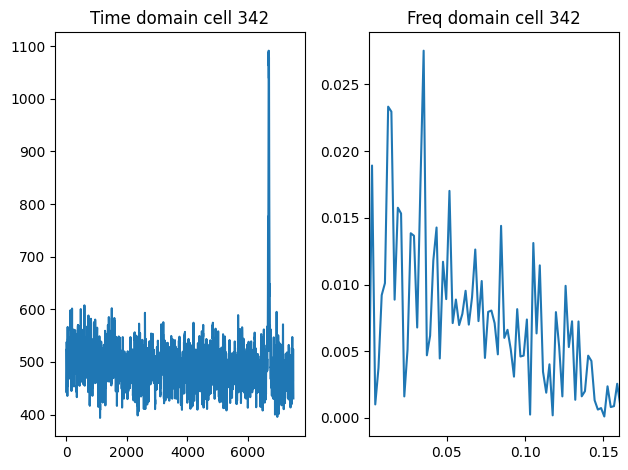

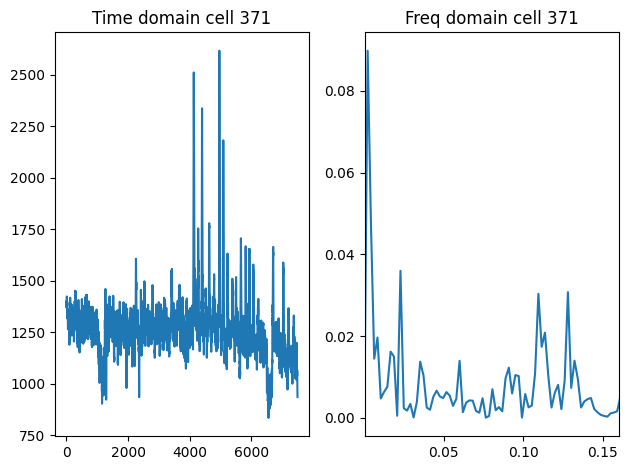

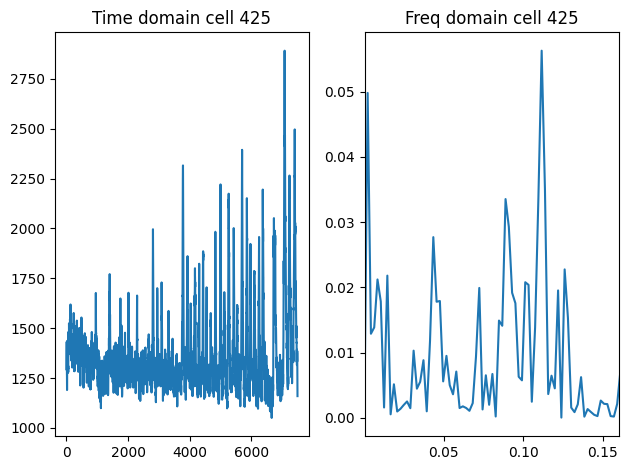

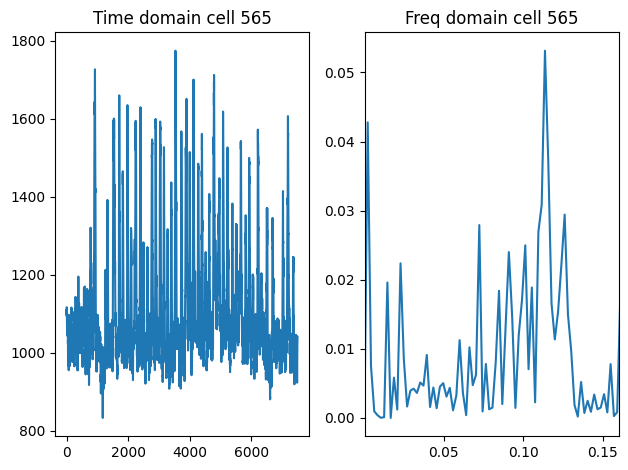

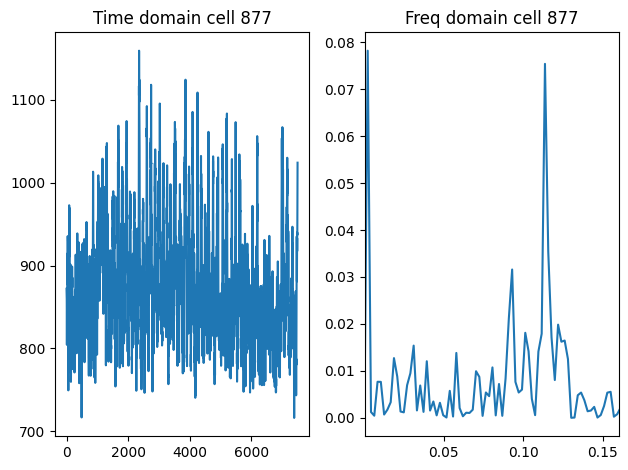

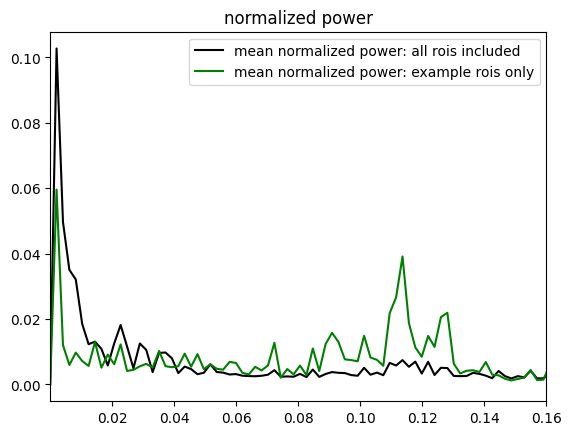

In [8]:
roi.plot_norm_power(data, [194, 342,371, 425, 565, 877])

In [6]:
# adjust freq bands selection criterion by looking at freq bands that have the biggest difference between green (good rois) and black (average noisy rois)
roi.transients_high=0.13
roi.transients_low=0.08

Transients high set to: 0.13 Hz
Transients low set to: 0.08 Hz


36 rois selected using power > 0.3


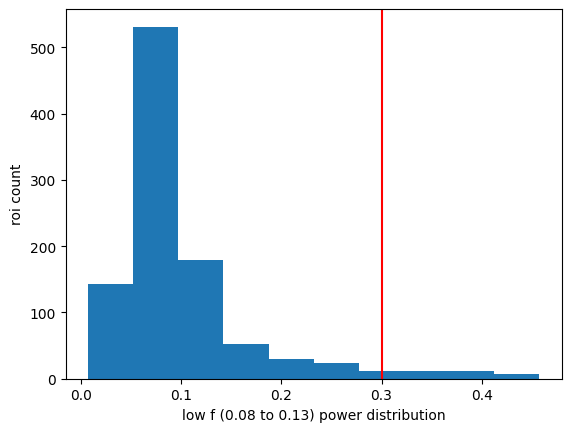

array([565, 877, 567, 344, 685, 226, 689, 648, 410, 631, 320, 167, 508,
       328, 382, 398, 839, 118, 912, 528, 749, 680, 933, 146, 425, 525,
       497,  38, 988, 147, 270, 321, 942, 412, 584, 722])

In [10]:
roi.rank_rois(data)

In [7]:
# move ratio lower to include more rois. lower thresh: more rois more false positives; higher thresh: less rois more false negatives
roi.norm_power_thresh=0.15

Norm power threshold set to 0.15


134 rois selected using power > 0.15


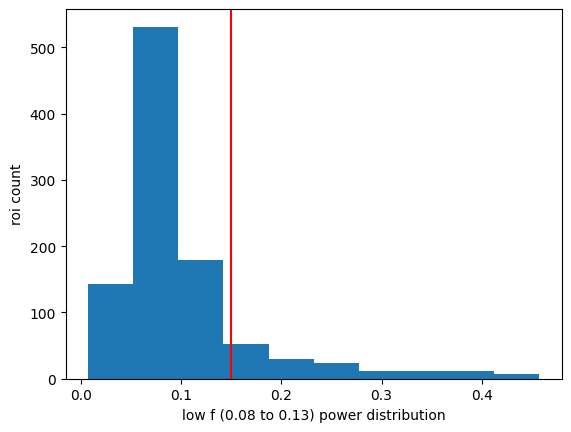

In [8]:
# rerun to include more rois. output rois are ranked in order
rois = roi.rank_rois(data)

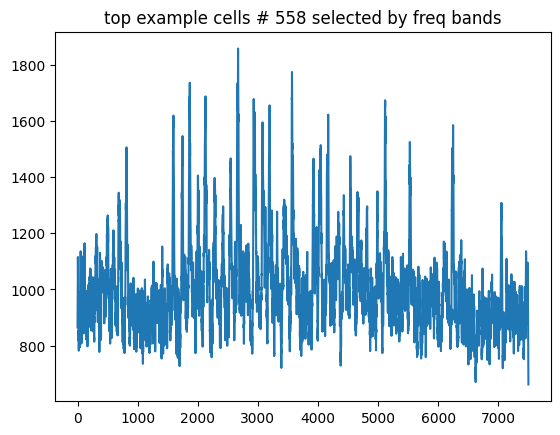

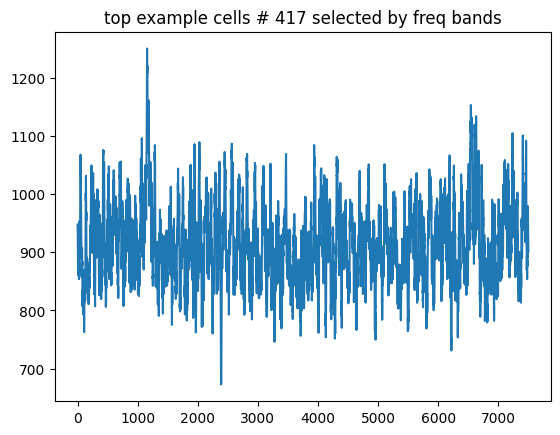

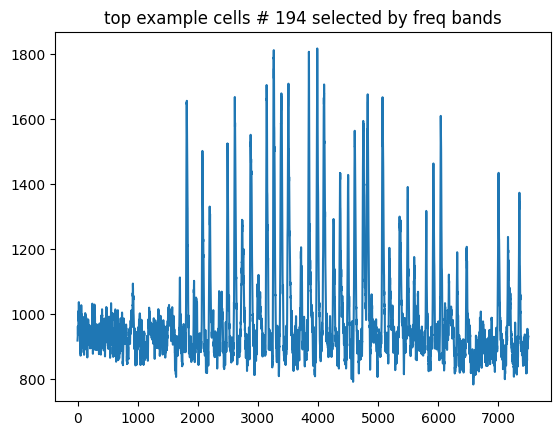

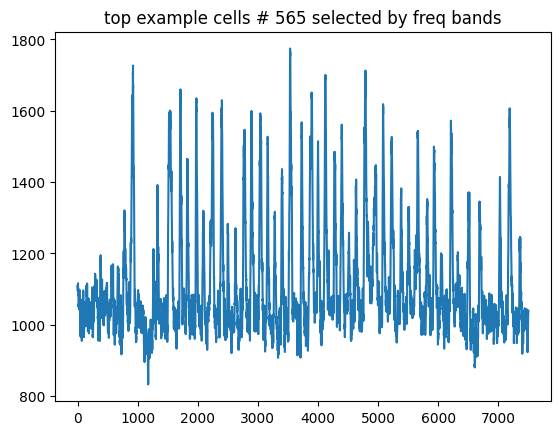

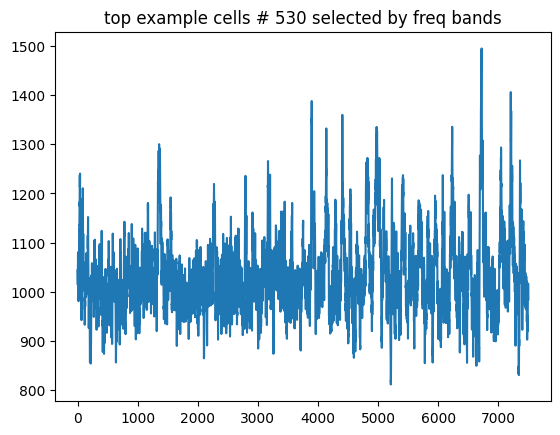

In [11]:
for n in range(5):
    plt.plot(data[rois[n], :])
    plt.title(f'top example cells # {rois[n]} selected by freq bands')
    plt.show()

# Motion detection

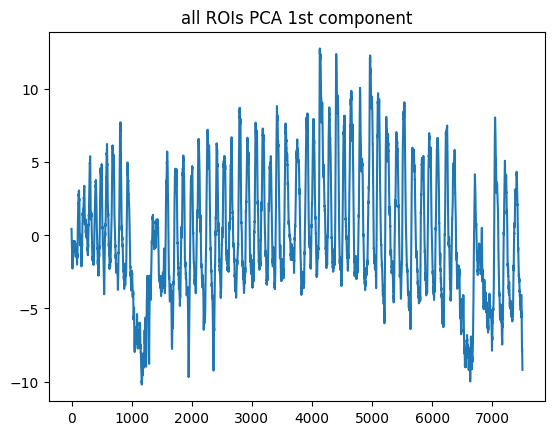

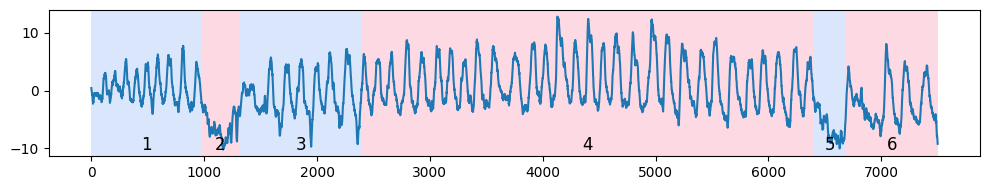

Finished. Now data in shape: (134, 7500)


In [9]:
data, change_points = detect_motion(data, rois)

# follow the prompt to select segments: press Ctrl+Enter to return
# example user inputs: 5, yes, 2 5, ,

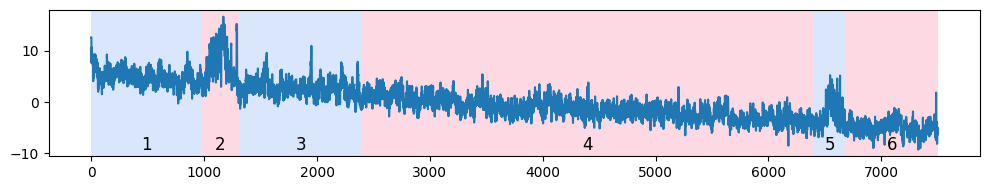

In [16]:
# validate segmentation using red static channel. Note: segment 2 and 5 in red channel also have level shift change => confirm motion during 2 and 5

validate_motion_static_channel(raw_red, rois, change_points)

# Transient detection and axon grouping

In [18]:
from src.main_pipeline import detect_transients_only, detect_transients_axons

In [33]:
transients, rois_only = detect_transients_only(data, rois)

Text(0.5, 1.0, 'example cell: smoothed')

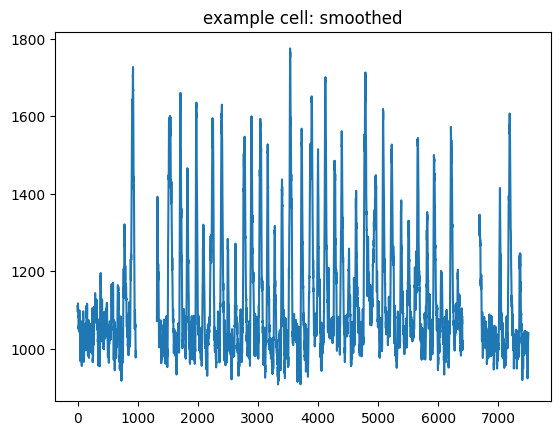

In [20]:
plt.plot(data[3, :])
plt.title('example cell: smoothed')

Text(0.5, 1.0, 'example cell: transients only (optional step - can be replaced with any other filter)')

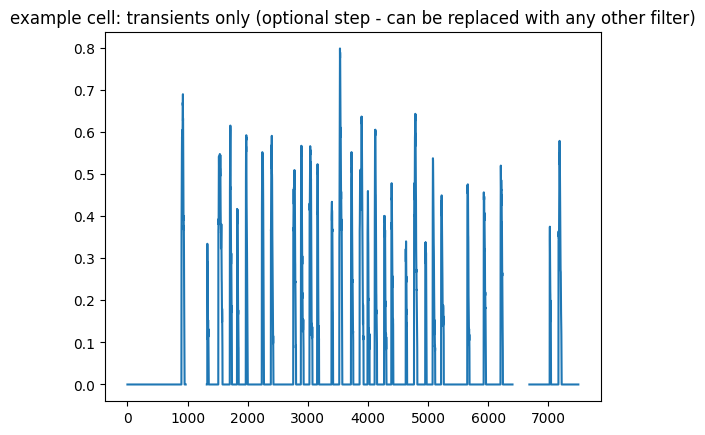

In [21]:
plt.plot(transients[3, :])
plt.title('example cell: transients only (optional step - can be replaced with any other filter)')

Grouping axons using params: {'method': 'correlation', 'min_corr': 0.4, 'corr_threshold': 0.7, 'cluster_early_stop': None, 'baseline_quantile': 0.08}
# potential non-singleton ROIs: 122, # singleton ROIs: 12


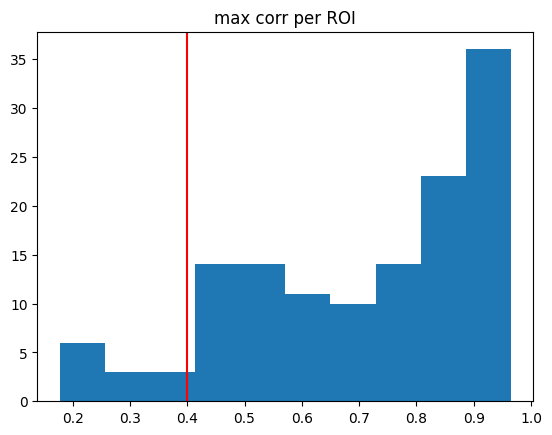

In [14]:
# Axon grouping: first step define method for combining axons
# example: pairwise correlation based method
axon_corr = GroupAxon('correlation', corr_threshold=0.7)    # only need to define once

# run transient detection and axon grouping together
axon_mat_corr, roi_map_corr = detect_transients_axons(data, rois, axon_corr)

Grouping axons using params: {'method': 'hierarchical', 'min_corr': 0.4, 'corr_threshold': None, 'cluster_early_stop': 0.2, 'baseline_quantile': 0.08}
# potential non-singleton ROIs: 122, # singleton ROIs: 12


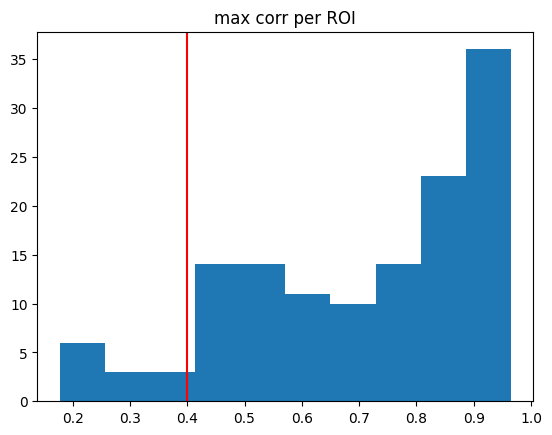

cluster 2 Silhouette score: 0.169, new best
cluster 3 Silhouette score: 0.223, new best
cluster 4 Silhouette score: 0.253, new best
cluster 5 Silhouette score: 0.272, new best
cluster 6 Silhouette score: 0.279, new best
cluster 7 Silhouette score: 0.301, new best
cluster 8 Silhouette score: 0.305, new best
cluster 9 Silhouette score: 0.317, new best
cluster 10 Silhouette score: 0.319, new best
cluster 11 Silhouette score: 0.332, new best
cluster 12 Silhouette score: 0.33, counting 1
cluster 13 Silhouette score: 0.346, new best
cluster 14 Silhouette score: 0.349, new best
cluster 15 Silhouette score: 0.343, counting 1
cluster 16 Silhouette score: 0.342, counting 2
cluster 17 Silhouette score: 0.352, new best
cluster 18 Silhouette score: 0.369, new best
cluster 19 Silhouette score: 0.37, new best
cluster 20 Silhouette score: 0.383, new best
cluster 21 Silhouette score: 0.391, new best
cluster 22 Silhouette score: 0.405, new best
cluster 23 Silhouette score: 0.41, new best
cluster 24 Silh

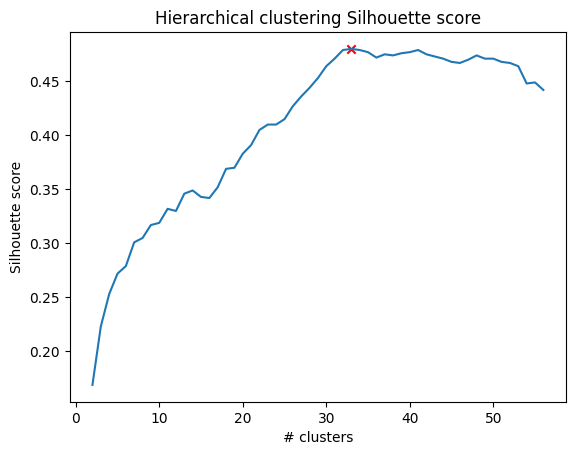

In [97]:
# example: hierarchical clustering
axon_hierarchical = GroupAxon('hierarchical', cluster_early_stop=0.2)    # only need to define once

# run transient detection and axon grouping together
axon_mat_hierarchical, roi_map_hierarchical = detect_transients_axons(data, rois, axon_hierarchical)

Grouping axons using params: {'method': 'kmeans', 'min_corr': 0.4, 'corr_threshold': None, 'cluster_early_stop': 0.1, 'baseline_quantile': 0.08}
# potential non-singleton ROIs: 122, # singleton ROIs: 12


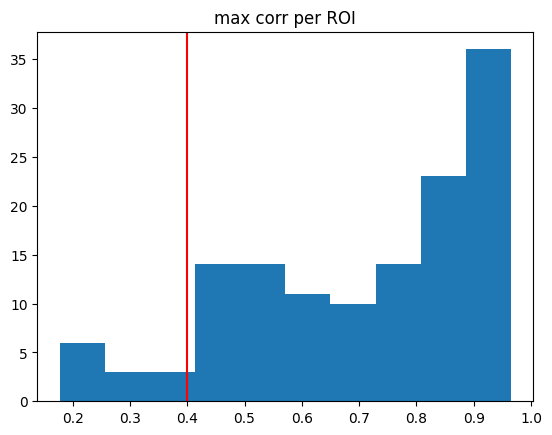

cluster 2 Silhouette score: 0.173, new best
cluster 3 Silhouette score: 0.206, new best
cluster 4 Silhouette score: 0.217, new best
cluster 5 Silhouette score: 0.237, new best
cluster 6 Silhouette score: 0.254, new best
cluster 7 Silhouette score: 0.293, new best
cluster 8 Silhouette score: 0.281, counting 1
cluster 9 Silhouette score: 0.294, new best
cluster 10 Silhouette score: 0.313, new best
cluster 11 Silhouette score: 0.318, new best
cluster 12 Silhouette score: 0.299, counting 1
cluster 13 Silhouette score: 0.302, counting 2
cluster 14 Silhouette score: 0.31, counting 3
cluster 15 Silhouette score: 0.334, new best
cluster 16 Silhouette score: 0.309, counting 1
cluster 17 Silhouette score: 0.326, counting 2
cluster 18 Silhouette score: 0.342, new best
cluster 19 Silhouette score: 0.335, counting 1
cluster 20 Silhouette score: 0.359, new best
cluster 21 Silhouette score: 0.357, counting 1
cluster 22 Silhouette score: 0.399, new best
cluster 23 Silhouette score: 0.384, counting 1
c

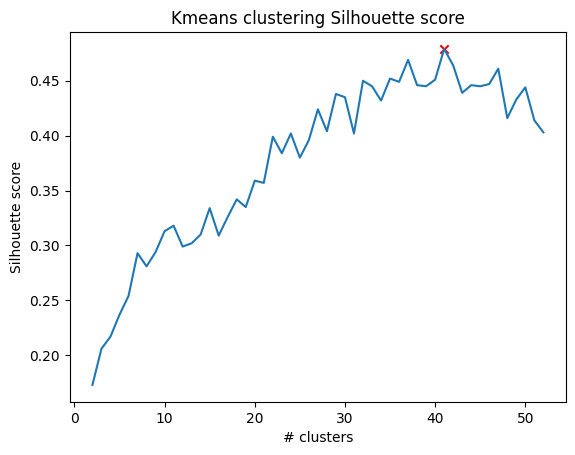

In [10]:
# example: kmeans
axon_kmeans = GroupAxon('kmeans', cluster_early_stop=0.1)    # only need to define once, recommend use a small cluster_early_stop value for kmeans

# run transient detection and axon grouping together
axon_mat_kmeans, roi_map_kmeans = detect_transients_axons(data, rois, axon_kmeans)

### `axon_mat` is the final processed result. `roi_map` relates the indices of final `axon_mat` to the original rois from suite2p

In [13]:
# for example, row 0 in final `axon_mat_kmeans` is from original rois 635, 355, 78
roi_map_kmeans

[{0: array([635, 355,  78]),
  1: array([558, 482]),
  2: array([470, 158, 238, 203]),
  3: array([745, 648, 931]),
  4: array([194, 431, 444, 295]),
  5: array([925, 956,  75]),
  6: array([530, 320, 382, 680]),
  7: array([97]),
  8: array([966]),
  9: array([226, 428]),
  10: array([842, 907, 732, 942]),
  11: array([599, 854, 651]),
  12: array([489, 257]),
  13: array([910, 422]),
  14: array([394, 829, 676]),
  15: array([685, 749, 933]),
  16: array([548,  88, 972]),
  17: array([223,  66, 772]),
  18: array([896, 946,  11]),
  19: array([578, 780]),
  20: array([858, 687, 481]),
  21: array([704, 813]),
  22: array([344, 528, 425, 497, 270, 175,  55]),
  23: array([485, 752]),
  24: array([398, 912, 146, 525, 147, 321, 412, 722]),
  25: array([542, 113, 170,  80]),
  26: array([571, 486]),
  27: array([689, 167, 508, 985]),
  28: array([877, 456, 839]),
  29: array([448]),
  30: array([264, 791, 698, 393, 821, 371]),
  31: array([820, 552, 584, 967, 954]),
  32: array([918, 988